**Cel projektu**

Celem przeprowadzonego ćwiczenia było osiągnięcie jak najlepszego wyniku w konkursie Kaggle. W ramach konkursu trzeba przygotować plik w tkórym zawarte są informacje na temat pasażerów Titanica - czy przeżył czy nie. Na wstępie otrzymujemy dwa pliki z danymi.  Plik train.csv zawiera dane pasażerów takie jak wiek, tytuł, ilość członków rodziny, płeć, oraz informację czy dana osoba przeżyła. W drugim pliku (test.csv) dostępna jest lista innych pasażerów, jednak bez informacji czy przeżyli. Używając danych z pliku train.csv należy przeprowadzić proces uczenia maszynowego w celu określenia, którym pasażerom z pliku test.csv udało się przetrwać katastrofę statku. W celu osiągnięcia jak najlepszego wyniku zostały przeprowadzona następująca analiza i proces uczenia maszynowego:

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #import biblioteki używanej do wizualizacji danych
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv") #pobranie danych z pliku train.csv 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


W pliku train dostępne jest wiele danych na temat pasażerów.

In [ ]:
train_data.columns #sprawdzenie jakie kolumny znajdują się w pliku train.csv

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv") #pobranie danych  pliku test.csv
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.columns #sprawdzenie jakie kolumny znajdują się w pliku test.csv

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

W pliku test.csv nie ma kolumny 'Survived', która informuje o tym czy dany pasażer przeżył.

In [ ]:
train_data.isnull().sum() #sprawdzenie ile jest wartości nieokreślonych w poszczególnych kolumnach

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data["Fare"] = train_data["Fare"].fillna(1) #zastosowanie funkcji fillna, która zamienia nieokreślone wartości w poszczególnych przypadkach argumentem (w naszym przypadku -1)
train_data["Age"] = train_data["Age"].fillna(1)


Nieokreślone wartości zastąpiłem wartością 1. W kolumnie wiek jest dużo nieokreślonych wartości zatem jest to duże uproszczenie. Jednak w dalszej częsci analizy pasażerowie są przydzielani do grup wiekowych i duża liczba pasażerów należy do grupy 1, więc nie powinno mieć to baedzo negatywnego wpływu na końcowy wynik. Wartości nieokreślonych w kolumnie Cabin nie zamieniam na inne wartości, ponieważ jest ich za dużo i nie będę ich brał pod uwagę w dalszej analizie.

In [ ]:
test_data.isnull().sum() #sprawdzenie ile jest wartości nieokreślonych w poszczególnych kolumnach

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data["Fare"] = test_data["Fare"].fillna(1)
test_data["Age"] = test_data["Age"].fillna(1)

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"] #sprawdzenie jaki procent kobiet przeżyło katastrofę
rate_women = sum(women)/len(women)*100

print("% kobiet, które przeżyły:", rate_women)

% kobiet, które przeżyły: 74.20382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"] #sprawdzenie jaki procent mężczyzn przeżyło katastrofę
rate_men = sum(men)/len(men)*100

print("% mężczyzn, którzy przeżyli:", rate_men)

% mężczyzn, którzy przeżyli: 18.890814558058924


Jak można odczytać zdecydowanie większy procent kobiet przetrwał katastrofę niż mężczyzn.

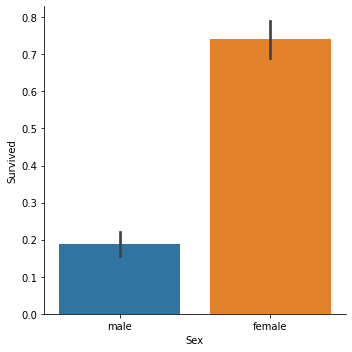

In [ ]:
 sns.catplot(x='Sex',y='Survived',data=train_data,kind='bar') #wykres procentowy osób, które przeżyły katastrofę w zależności od płci

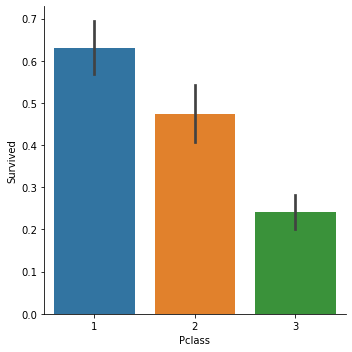

In [ ]:
sns.catplot(x='Pclass',y='Survived',data=train_data,kind='bar')  #wykres procentowy osób, które przeżyły katastrofę w zależności od klasy w jakiej podróżowali

Zdecydowanie większy procent osób podróżujących w klasie 1 przeżyło w porównaniu z klasą 3.

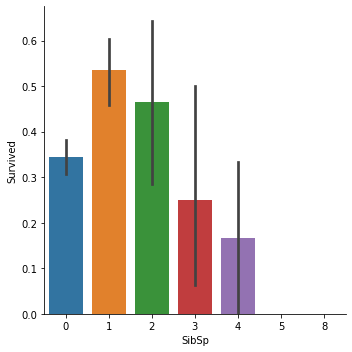

In [ ]:
sns.catplot(x='SibSp',y='Survived',data=train_data,kind='bar')  #wykres procentowy osób, które przeżyły katastrofę w zależności od ilości rodzeństwa na pokładzie

Można zauważyć, że osoby, które posiadały 5 lub 8 rodzeństwa mają 0% szans na przeżycie.

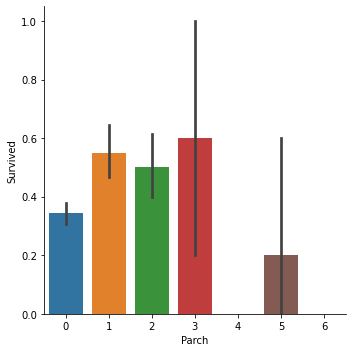

In [ ]:
sns.catplot(x='Parch',y='Survived',data=train_data,kind='bar')

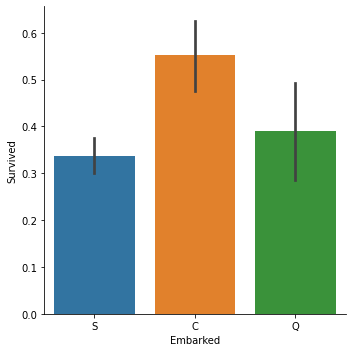

In [ ]:
sns.catplot(x='Embarked',y='Survived',data=train_data,kind='bar')  #wykres procentowy osób, które przeżyły katastrofę w zależności od parametru embarked

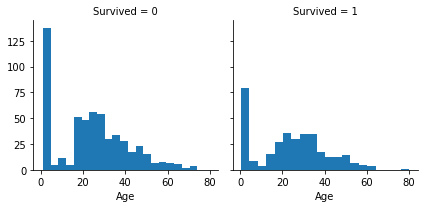

In [ ]:
g = sns.FacetGrid(train_data, col='Survived') #wykresy ilości osób, które przeżyły i nie przeżyły w zależności od wieku
g.map(plt.hist, 'Age', bins=20)

Największą grupę osób na obu wykresach stanowią niemowlęta, ponieważ zostały tam przypisane osoby, które nie posiadały danych o aktualnym wieku. Następnie najwięcej osób które nie przetrwały były w grupie wiekowej 20 - 40 lat. Identyczna zależność istnieje dla grupy osób, które przeżyły.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


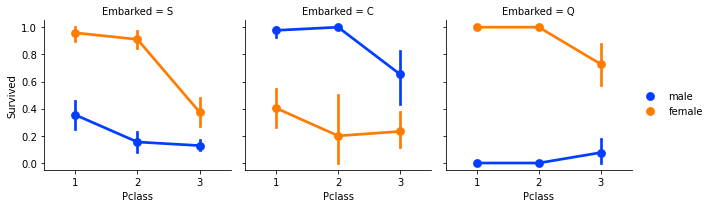

In [ ]:
grid = sns.FacetGrid(train_data, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='bright')
grid.add_legend()

Wykresy przedstawiają procent osób które przeżyły w zależności od parametru Embarked, w zależności od klasy w jakiej podróżowały oraz z podziałem na płeć. Można zaobserwować że mężczyżni z parametrami embarked S oraz Q mają małe szanse na przeżycie niezależnie od klasy w jakiej podróożowali. Dużą szansę na przetrwanie mają za to kobiety z embarked S i Q oraz z 1 i 2 klasy

In [ ]:
train = train_data.drop(['Ticket', 'Cabin'],  axis=1) #utworzenie nowej tablicy zawierającej dane z train_data bez kolumn: Ticket i Cabin
test = test_data.drop(['Ticket', 'Cabin'], axis=1)
train_test = [train, test]

Kolumny Ticket oraz Cabin odrzuciłem, ponieważ w kolumnie Cabin jest dużo nieokreślonych wartości, natomiast kolumna Ticket jest nieprzydatna w analizie. 

In [ ]:
for dataset in train_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) #stworzenie nowej kolumny która przechowuje informacje na temat tytułu pasażera wyłuskanego z kolumny Name

pd.crosstab(train['Title'], train['Sex']) #wypisanie ile jest osób z danym tytułem, danej płci

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() #określenie %osób, które przetrwały w zależności od posiadanego tytułu

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


Można zaobserwować, że 100% osób posiadające niektóre tytuły przeżyły. Są także tytułu, których właściciele mają 0% szans na przetrwanie.

In [ ]:
zamiana = {"Sir" : 1, "MMe": 1, "Mlle" : 1, "Lady" : 1, "Countess" : 1, "Mrs": 2, "Miss": 2, "Master" : 3, "Major" : 3, "Dr" : 3, "Col" : 3, "Mr" : 4, "Rev" : 5, "Jonkher" : 5, "Don" : 5, "Capt": 5}
for dataset in train_test:
     dataset['Title'] = dataset['Title'].map(zamiana) #zamiana kolumny Title na wartości liczbowe w zależności od posiadanego tytułu 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4.0


Pasażerowie zostali przydzieleni do poszczególnych grup ze względu na podobny procent szans na przeżycie.

In [ ]:
train['Age_1'] = pd.cut(train['Age'], 6) #stworzenie nowej kolumny Age_1 i przypisywanie jej odpowiednich przedziałów powstałych z kolumny Age 
train[['Age_1', 'Survived']].groupby(['Age_1'], as_index=False).mean().sort_values(by='Age_1', ascending=True) #określenie procentu szans na przeżycie poszczególnych grup wiekowych

,Age_1,Survived
0,"(0.34, 13.683]",0.379032
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.428571
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


In [ ]:
   for dataset in train_test:  #przypisanie pasażerowi odpowiedniej grupy wiekowej od 1 do 6 w zależności od grupy wiekowej
    dataset.loc[ dataset['Age'] <= 13.7, 'Age'] = 1
    dataset.loc[(dataset['Age'] >= 13.8) & (dataset['Age'] <= 26.9), 'Age'] = 2
    dataset.loc[(dataset['Age'] >= 27.0) & (dataset['Age'] <= 40.2), 'Age'] = 3 
    dataset.loc[(dataset['Age'] >= 40.03) & (dataset['Age'] <= 53.4), 'Age'] = 4
    dataset.loc[(dataset['Age'] >= 53.5) & (dataset['Age'] <= 66.6), 'Age'] = 5
    dataset.loc[ dataset['Age'] >= 66.7, 'Age'] = 6
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_1
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,7.2500,S,4.0,"(13.683, 26.947]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,71.2833,C,2.0,"(26.947, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,7.9250,S,2.0,"(13.683, 26.947]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,53.1000,S,2.0,"(26.947, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,8.0500,S,4.0,"(26.947, 40.21]"


In [ ]:
train['Fare_1'] = pd.cut(train['Fare'], 4) #stworzenie nowej kolumny Fare_1 i przypisywanie jej odpowiednich przedziałów powstałych z kolumny Fare 
train[['Fare_1', 'Survived']].groupby(['Fare_1'], as_index=False).mean().sort_values(by='Fare_1', ascending=True) #określenie procentu szans na przeżycie poszczególnych grup cenowych 

,Fare_1,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [ ]:
for dataset in train_test:    #przypisanie pasażerowi odpowiedniej grupy wiekowej od 1 do 4 w zależności od opłaty
    dataset.loc[ dataset['Fare'] <= 128, 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 128.1) & (dataset['Fare'] <= 256.1), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 256.2) & (dataset['Fare'] <= 384.1), 'Fare'] = 3
    dataset.loc[ dataset['Fare'] > 384.2, 'Fare'] = 4
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_1,Fare_1
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,1.0,S,4.0,"(13.683, 26.947]","(-0.512, 128.082]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,1.0,C,2.0,"(26.947, 40.21]","(-0.512, 128.082]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,1.0,S,2.0,"(13.683, 26.947]","(-0.512, 128.082]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,1.0,S,2.0,"(26.947, 40.21]","(-0.512, 128.082]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,1.0,S,4.0,"(26.947, 40.21]","(-0.512, 128.082]"


In [ ]:
for dataset in train_test: #przypisanie pasażerom w kolumnie Sex wartości 0 lub 1 w zależności od płci
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [ ]:
for dataset in train_test: #zmaian wartości nieokreślonych w Embarked na S
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
for dataset in train_test: #przydzielenie pasażerom wwartości liczbowych w zależności od wartości parametru Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 3, 'Q': 2, 'S' : 1} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_1,Fare_1
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,1.0,1,4.0,"(13.683, 26.947]","(-0.512, 128.082]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,1.0,3,2.0,"(26.947, 40.21]","(-0.512, 128.082]"
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,1.0,1,2.0,"(13.683, 26.947]","(-0.512, 128.082]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.0,1,0,1.0,1,2.0,"(26.947, 40.21]","(-0.512, 128.082]"
4,5,0,3,"Allen, Mr. William Henry",1,3.0,0,0,1.0,1,4.0,"(26.947, 40.21]","(-0.512, 128.082]"


In [ ]:
for dataset in train_test: #stworzenie nowej kolumny określającej liczbę członków rodziny pasażera
    dataset['Family'] = dataset['SibSp'] +  dataset['Parch']

In [ ]:
train = train.drop(['Name', 'SibSp', 'Age_1', 'Fare_1', 'Parch'], axis=1) #usunięcie niepotrzebnych już kolumn ze zmiennej train
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0,3,1,2.0,1.0,1,4.0,1
1,2,1,1,0,3.0,1.0,3,2.0,1
2,3,1,3,0,2.0,1.0,1,2.0,0
3,4,1,1,0,3.0,1.0,1,2.0,1
4,5,0,3,1,3.0,1.0,1,4.0,0


In [ ]:
test = test.drop(['Name', 'SibSp', 'Parch'], axis=1) #usunięcie niepotrzebnych już kolumn ze zmiennej test
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,892,3,1,3.0,1.0,2,4.0,0
1,893,3,0,4.0,1.0,1,2.0,1
2,894,2,1,5.0,1.0,2,4.0,0
3,895,3,1,3.0,1.0,1,4.0,0
4,896,3,0,2.0,1.0,1,2.0,2


Osiągnięte zostały końcowe dane, które będą użyte do uczenia maszynowego. Parametrami użytymi do uczenia maszynowego będą: Pclass, Sex, Age, Fare, Embarked, Title oraz Family

In [ ]:
train.isnull().sum() #Sprawdzenie czy są wartości nieokreślone w poszczególnych kolumnach

In [ ]:
train["Title"] = train["Title"].fillna(3)

In [ ]:
test.isnull().sum() #Sprawdzenie czy są wartości nieokreślone w poszczególnych kolumnach

In [ ]:
test["Title"] = test["Title"].fillna(3)

Zarówno w tablicy train jak i test są niekreślone wartości w kolumnie title, jednak jest ich niewiele i zostały do nich przypisane wartości 3.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass","Sex", "Family", "Embarked", "Fare", "Age", "Title"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Do nauki maszynowej została użyta metoda losowego lasu, który składa się z wielu drzew decyzyjnych. Jest to metoda, która tworzy drzewa decyzyjne na losowo wybranych próbkach danych, pobiera prognozę z każdego drzewa i wybiera najlepsze rozwiązanie w drodze głosowania. W przyjętym modelu jest 50 drzew oraz maksymalna głębokość drzewwa wynosi 7. Jako dane uczące zostały wybrane ze zmiennej tablicowej train. Na ich podstawie określane jest, którzy z pasażerów zawartych w tablicy test przetrwają katastrofę. 

Tak przeprowadzone uczenie dało wynik 0.78947, co jest wynikiem lepszym niż dla sposobu, gdzie przyjmowano, że przeżyły tylko kobiety, a także lepszy niż dla analizy przeprowadzonej w samouczku. Lepszy wynik przypuszczalnie mógłby być osiągnięty w przypadku zastąpienia nieokreślonych wartości wartościami średnimi z wartości kolumn, lub losowo wybranymi z wyznaczonych przedziałów. Lepszy wynik może być także osiągnięty przez zastosowanie innego podziału jeżeli chodzi na przykład o wiek lub opłatę.

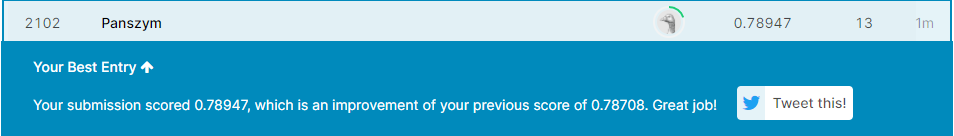